### chapter 13 합성곱 신경망
이미지의 경우 파라미터가 많고 완전 연결을 위해 1차원 배열로 만들 경우 특성이 사라진다.  
합성곱층(convolutuial layer) - 입력의 이미자 합성곱층 뉴런의 수용장 안에 있는 픽셀에 연결된다.  
스트라이드만큼 옮겨 가면서 필터를 적용시키는데 정보의 손실을 줄이고 입력과 출력을 일정하게 하기위해 제로 패딩(입력의 주위에 0을 추가)을 추가한다.
입력 - (필터 또는 합성곱 커널) -> 특성 맵

In [1]:
import tensorflow as tf
import numpy as np
from sklearn.datasets import load_sample_images
from matplotlib import pyplot as plt  

In [0]:
image=load_sample_images()

In [0]:
china=image.images[0]
flower=image.images[1]

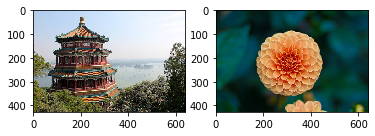

In [4]:
plt.subplot(121)
plt.imshow(china)
plt.subplot(122)
plt.imshow(flower)

In [0]:
a,b,c=china.shape
X=tf.placeholder(shape=(None,a,b,c),dtype=tf.float32)
conv=tf.layers.conv2d(X,1,3,padding='SAME')
init=tf.global_variables_initializer()

In [0]:
with tf.Session() as sess:
  init.run()
  re=conv.eval({X:image.images})

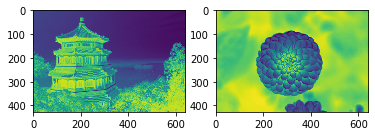

In [7]:
plt.subplot(121)
plt.imshow(re.reshape((2,427,640))[0])
plt.subplot(122)
plt.imshow(re.reshape((2,427,640))[1])

#### 13.3 풀링층
풀링층 - 계산량, 메모리 사용량, 파라미터 수, 과대 적합의 위험을 줄인다.  
최대 풀링층, 평균 풀링층이 있다.

In [0]:
max_pool=tf.nn.max_pool(re,ksize=[1,2,2,1],strides=[1,2,2,1],padding="VALID")
with tf.Session():
  out=max_pool.eval()  

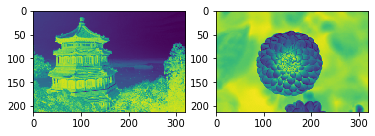

In [9]:
plt.subplot(121)
plt.imshow(out.reshape((2, 213, 320))[0])
plt.subplot(122)
plt.imshow(out.reshape((2, 213, 320))[1])

#### 13.4 CNN 구조
이 합성곱층과 풀링층의 조합으로 다양한 모델을 만들 수 있다.  
LeNet-5,AlexNet  
GoogLeNet - 인셉션 모듈 사용  
ResNet - 잔차 유닛 사용